In [713]:
import os
import numpy as np
import pandas as pd

import pymatgen as pg
import os


In [714]:

def local_min(df):

    df['dy'] = df['E-dispersion'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()

    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] > 0)]

    if len(local_min_indices) == 0:
        print('No local max found')
        new_df = pd.DataFrame(columns=['cell_length', 'E-dispersion'])
        # put values 0 , 0 in the dataframe
        new_df.loc[0] = [0, 0]
        print(min(new_df['E-dispersion']))
        return new_df
    local_mins = df.loc[local_min_indices, ['cell_length', 'E-dispersion']].reset_index(drop=True)

    return local_mins

def local_max(df):
    df['dy'] = df['E-dispersion'].diff()

    df['sign_dy'] = np.sign(df['dy'])
    df['sign_change'] = df['sign_dy'].diff()
    
    # Indices of local maxima: derivative goes from negative (-1) to positive (+1)
    local_min_indices = df.index[(df['sign_change'] < 0)]

    if len(local_min_indices) == 0:
        print('No local max found')
        new_df = pd.DataFrame(columns=['cell_length', 'E-dispersion'])
        # put values 0 , 0 in the dataframe
        new_df.loc[0] = [0, 0]
        print(min(new_df['E-dispersion']))
        return new_df

    local_max = df.loc[local_min_indices, ['cell_length', 'E-dispersion']].reset_index(drop=True)
    return local_max

In [715]:
def finding_diff(df):
    abs_max = df['E-dispersion'].iloc[-1]
    max_val = max(local_max(df)['E-dispersion'])
    min_val = min(local_min(df)['E-dispersion'])

    
    if np.isnan(abs_max):
        abs_max = 0
        
    # print('a',abs_max)
    # print('b',max_val)
    # print('c',min_val)

    if max_val == 0 or min_val == 0:
        return 0

    diff = (abs_max + max_val)/2 - min_val

    return diff

In [716]:
li_d3s = os.listdir('../d3_mbd_features_data/d3')

In [717]:
delta_e = []
cnt = 0
for items in li_d3s:
    print(f"Processing {items}")
    cnt+=1
    #get the path of each folder
    path = '../d3_mbd_features_data/d3'
    # print(items)
    
    #ignore .DS_Store
    if items == ".DS_Store":
        continue
    file = os.path.join(path, f'{items}')
    struct_file = os.path.join(path, 'POSCAR')
    df = pd.read_csv(file)
    print(f"Reading {file}")

    diff_energy = finding_diff(df)
    delta_e.append({f'{items.strip('.csv')}': diff_energy})

Processing Mn.csv
Reading ../d3_mbd_features_data/d3/Mn.csv
Processing Al.csv
Reading ../d3_mbd_features_data/d3/Al.csv
Processing LiSnS2.csv
Reading ../d3_mbd_features_data/d3/LiSnS2.csv
Processing CsCl.csv
Reading ../d3_mbd_features_data/d3/CsCl.csv
Processing Li.csv
Reading ../d3_mbd_features_data/d3/Li.csv
Processing Na.csv
Reading ../d3_mbd_features_data/d3/Na.csv
Processing C.csv
Reading ../d3_mbd_features_data/d3/C.csv
No local max found
0
No local max found
0
Processing Cu.csv
Reading ../d3_mbd_features_data/d3/Cu.csv
Processing SnS2.csv
Reading ../d3_mbd_features_data/d3/SnS2.csv
Processing BaCl2.csv
Reading ../d3_mbd_features_data/d3/BaCl2.csv
Processing Ca.csv
Reading ../d3_mbd_features_data/d3/Ca.csv
Processing NaH.csv
Reading ../d3_mbd_features_data/d3/NaH.csv
Processing LiF.csv
Reading ../d3_mbd_features_data/d3/LiF.csv
Processing KH.csv
Reading ../d3_mbd_features_data/d3/KH.csv
Processing LiCoO2.csv
Reading ../d3_mbd_features_data/d3/LiCoO2.csv
Processing ZnS.csv
Reading

In [718]:
delta_e

[{'Mn': 0.8319949999999999},
 {'Al': 0.24184499999999998},
 {'LiSnS2': 0.28300000000000003},
 {'CsCl': 0.28082},
 {'Li': 0.68477},
 {'Na': 0.5197999999999999},
 {'C': 0},
 {'Cu': 0.75623},
 {'SnS2': 0.01528500000000002},
 {'BaCl2': 0.30561000000000005},
 {'Ca': 0.71688},
 {'NaH': 1.490305},
 {'LiF': 1.3838450000000002},
 {'KH': 1.2564950000000001},
 {'LiCoO2': 1.5770049999999998},
 {'ZnS': 0.3072450000000001},
 {'CuI': 0.060145000000000004},
 {'LiH': 2.146945},
 {'CoO2': 0.10687500000000003},
 {'RbH': 0.7611600000000001},
 {'Mg': 0.25236000000000003},
 {'Ni': 1.3296099999999997},
 {'LiCl': 0.5037100000000001},
 {'CsH': 0.871385}]

In [719]:
import csv
with open('without_ref.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Compound', 'Value'])

    for item in delta_e:
        for compound, value in item.items():
            writer.writerow([compound, value])

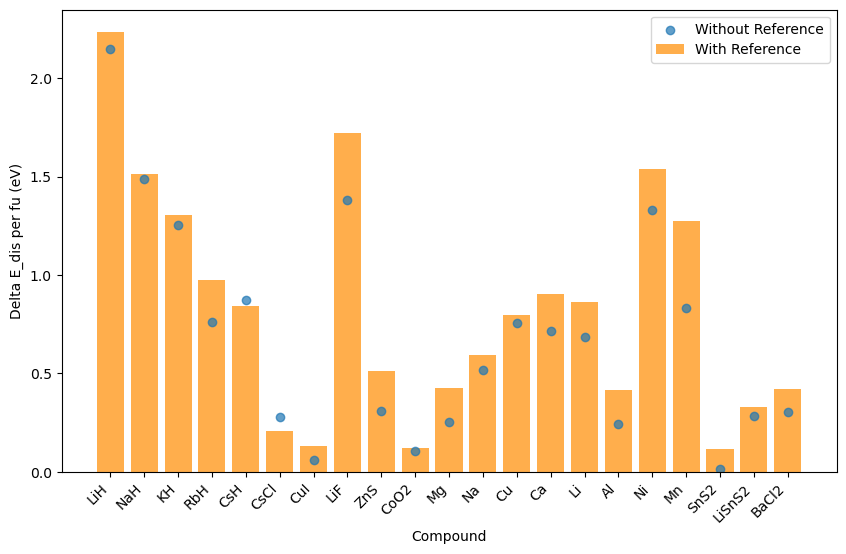

In [720]:
import matplotlib.pyplot as plt

df1 = pd.read_csv('without_ref.csv')
df2 = pd.read_csv('with_ref.csv')


# removing compounds  LiCl and LiCoO2
df1 = df1[~df1['Compound'].isin(['LiCl', 'LiCoO2','C'])]
df2 = df2[~df2['Compound'].isin(['LiCl', 'LiCoO2','C'])]

plt.figure(figsize=(10, 6))
# plt.plot(df1['Compound'], df1['Value'], label='Without Reference', alpha=0.7)
plt.bar(df2['Compound'], df2['Value'], label='With Reference', alpha=   0.7, color='darkorange')
plt.scatter(df1['Compound'], df1['Value'], label='Without Reference', alpha=0.7)

plt.legend()
# rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.xlabel('Compound')
plt.ylabel('Delta E_dis per fu (eV)')
plt.show()
